<a href="https://colab.research.google.com/github/VictorArapis/imersao_python_alura/blob/main/4_aula_e_desafio_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aula 4 - Análises avançadas e Gráficos de velas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mplfinance as mpf
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots

Baixando os dados do ativo da Petrobras: 01-01-2023 para 31-12-2023

In [ ]:
dados = yf.download('PETR4.SA', start='2023-01-01', end='2023-12-31')
dados

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,17.709478,78424700
2023-01-03,22.940001,23.100000,22.129999,22.340000,17.261332,96750300
2023-01-04,21.959999,23.590000,21.830000,23.049999,17.809923,129504000
2023-01-05,23.340000,24.040001,23.150000,23.879999,18.451235,73886000
2023-01-06,23.940001,24.320000,23.549999,23.740000,18.343063,51851500
...,...,...,...,...,...,...
2023-12-21,36.669998,36.680000,36.070000,36.389999,36.389999,30511900
2023-12-22,36.500000,36.799999,36.369999,36.740002,36.740002,31234700
2023-12-26,36.860001,37.369999,36.830002,37.330002,37.330002,23466800


In [ ]:
# Renomeando as colunas
dados.columns = ['Abertura', 'Maximo', 'Minimo', 'Fechamento', 'Fech_Adjust', 'Volume']

In [ ]:
# Renomeando o eixo
dados = dados.rename_axis('Data')
dados

,Abertura,Maximo,Minimo,Fechamento,Fech_Adjust,Volume
Data,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,17.709478,78424700
2023-01-03,22.940001,23.100000,22.129999,22.340000,17.261332,96750300
2023-01-04,21.959999,23.590000,21.830000,23.049999,17.809923,129504000
2023-01-05,23.340000,24.040001,23.150000,23.879999,18.451235,73886000
2023-01-06,23.940001,24.320000,23.549999,23.740000,18.343063,51851500
...,...,...,...,...,...,...
2023-12-21,36.669998,36.680000,36.070000,36.389999,36.389999,30511900
2023-12-22,36.500000,36.799999,36.369999,36.740002,36.740002,31234700
2023-12-26,36.860001,37.369999,36.830002,37.330002,37.330002,23466800


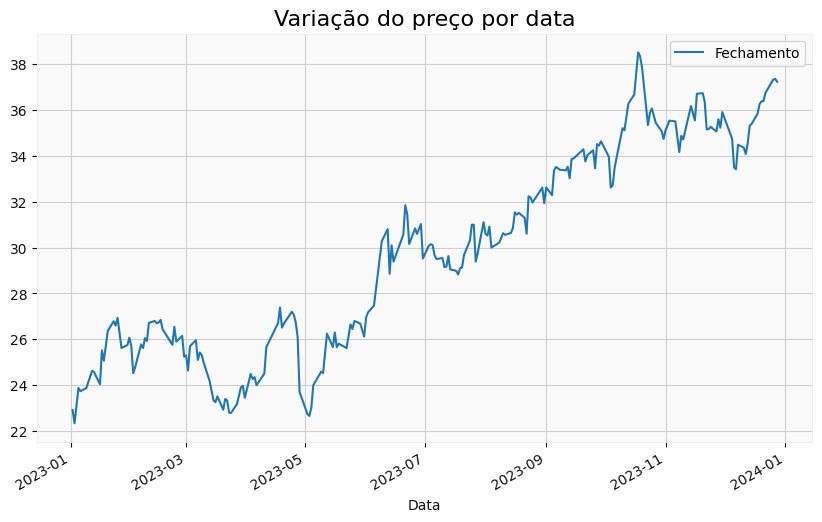

In [ ]:
dados['Fechamento'].plot(figsize=(10,6))
plt.title('Variação do preço por data', fontsize=16)
plt.legend(['Fechamento'])

In [ ]:
df = dados.head(60).copy()

# Convertendo o índice em uma coluna de data
df['Data'] = df.index

# Convertendo as datas para o formato numérico de matplotlib
# Isso é necessário para que o matplotlib possa plotar as datas corretamente no gráfico
df['Data'] = df['Data'].apply(mdates.date2num)

df

,Abertura,Maximo,Minimo,Fechamento,Fech_Adjust,Volume,Data
Data,,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,17.709478,78424700,19359.0
2023-01-03,22.940001,23.100000,22.129999,22.340000,17.261332,96750300,19360.0
2023-01-04,21.959999,23.590000,21.830000,23.049999,17.809923,129504000,19361.0
2023-01-05,23.340000,24.040001,23.150000,23.879999,18.451235,73886000,19362.0
2023-01-06,23.940001,24.320000,23.549999,23.740000,18.343063,51851500,19363.0
2023-01-09,23.500000,24.000000,23.250000,23.870001,18.443510,46385200,19366.0
2023-01-10,23.950001,24.110001,23.370001,24.090000,18.613495,52741100,19367.0
2023-01-11,24.150000,24.620001,24.049999,24.280001,18.760303,53536500,19368.0
2023-01-12,24.290001,24.650000,24.110001,24.629999,19.030735,58130000,19369.0


In [ ]:
petrobras= yf.download('PETR4.SA', start='2023-01-01', end='2023-12-31')
petrobras

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,23.540001,23.809999,22.799999,22.920000,17.709478,78424700
2023-01-03,22.940001,23.100000,22.129999,22.340000,17.261332,96750300
2023-01-04,21.959999,23.590000,21.830000,23.049999,17.809923,129504000
2023-01-05,23.340000,24.040001,23.150000,23.879999,18.451235,73886000
2023-01-06,23.940001,24.320000,23.549999,23.740000,18.343063,51851500
...,...,...,...,...,...,...
2023-12-21,36.669998,36.680000,36.070000,36.389999,36.389999,30511900
2023-12-22,36.500000,36.799999,36.369999,36.740002,36.740002,31234700
2023-12-26,36.860001,37.369999,36.830002,37.330002,37.330002,23466800


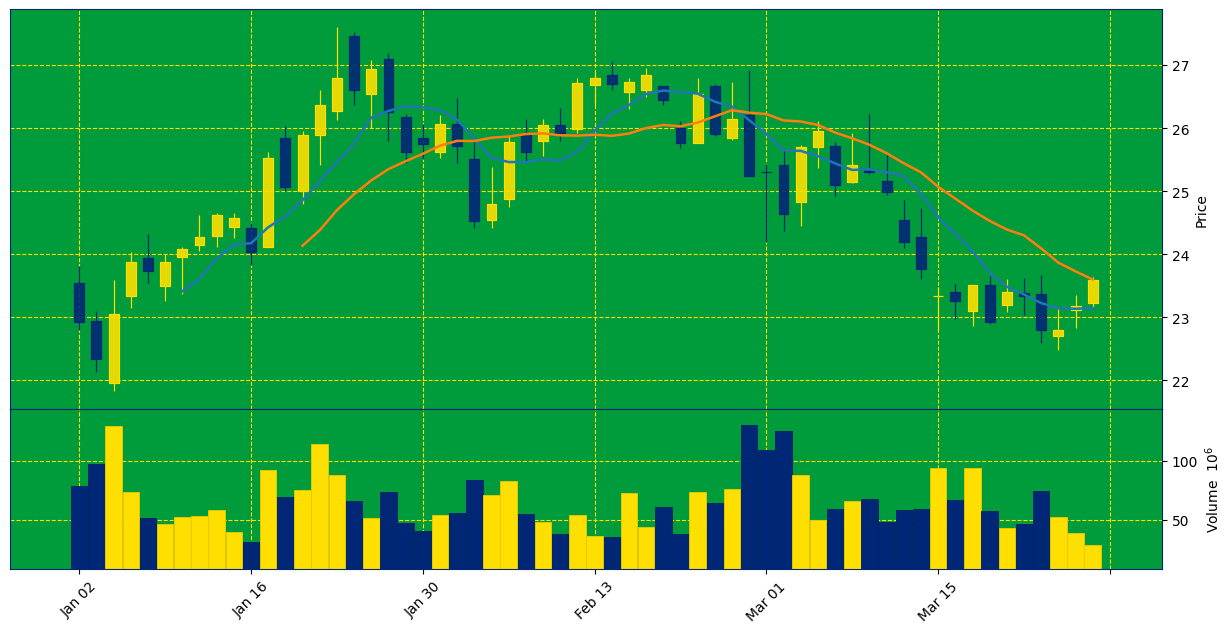

In [ ]:
mpf.plot(petrobras.head(60), type='candle', figsize = (16,8), volume=True, mav=(7,14), style='brasil')
# Ações da Petrobras (2023/01/03) - (2023/03/29)

In [ ]:
petrobras= yf.download('PETR4.SA', start='2022-01-01', end='2022-12-31')
petrobras

[*********************100%%**********************]  1 of 1 completed

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,28.540001,29.219999,28.530001,29.090000,14.063069,52704700
2022-01-04,29.160000,29.400000,28.910000,29.200001,14.116246,51739200
2022-01-05,29.190001,29.270000,27.940001,28.070000,13.569966,78459800
2022-01-06,28.290001,28.650000,27.840000,28.049999,13.560297,61163100
2022-01-07,28.110001,28.290001,27.820000,28.180000,13.623143,47507600
...,...,...,...,...,...,...
2022-12-23,24.129999,25.219999,24.129999,25.120001,19.409340,68387900
2022-12-26,25.120001,25.299999,24.820000,24.940001,19.270260,28765200
2022-12-27,25.250000,25.309999,24.549999,25.110001,19.401613,50803200


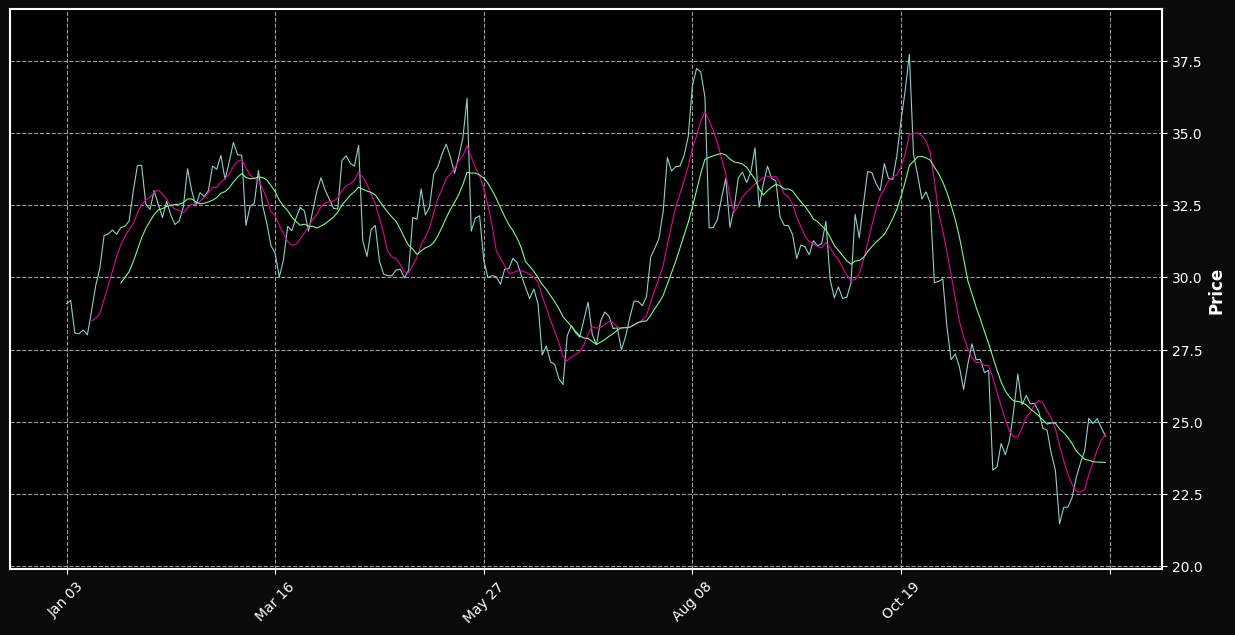

In [ ]:
mpf.plot(petrobras.head(250), type='line', figsize = (16,8), volume=False, mav=(7,14), style='mike')
# Petrobras 2022

In [ ]:
apple = yf.download('AAPL', start='2023-01-01', end='2023-12-31')
apple

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.216301,112117500
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.497498,89113600
2023-01-05,127.129997,127.769997,124.760002,125.019997,124.166641,80962700
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.735214,87754700
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.261627,70790800
...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.353287,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.803986,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.903839,48087700


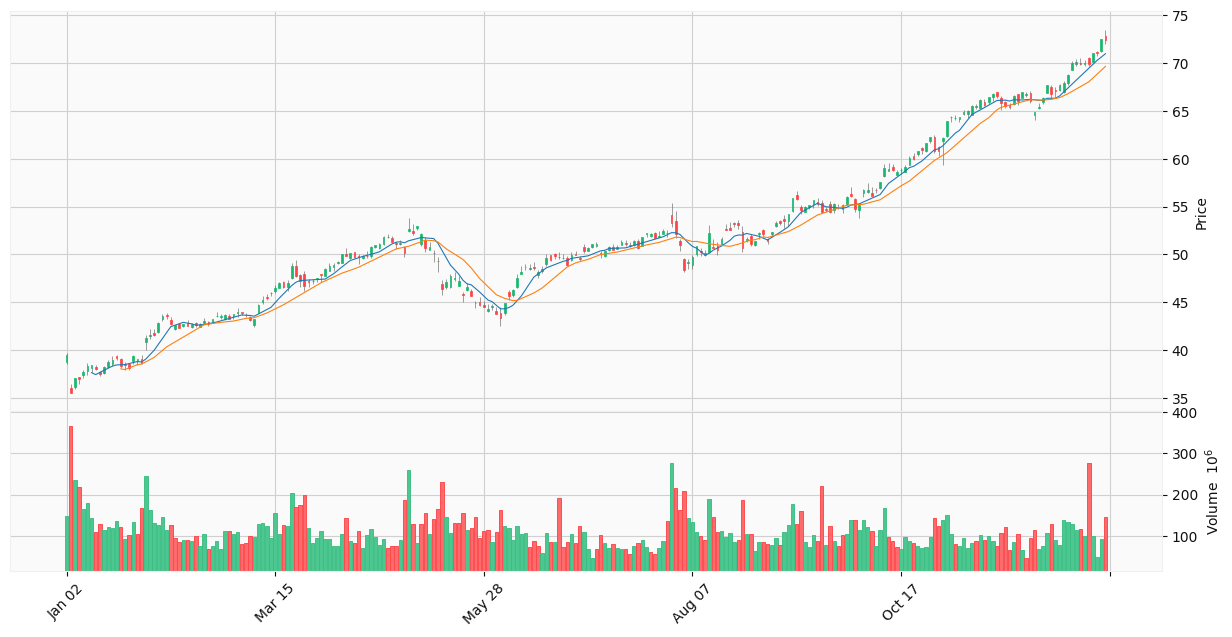

In [ ]:
mpf.plot(apple.head(250), type='candle', figsize = (16,8), volume=True, mav=(7,14), style='yahoo')
# Ações da apple de todo o ano de (2023)

In [ ]:
apple= yf.download('AAPL', start='2019-01-01', end='2024-04-03')
apple

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,37.845043,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.075394,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.530045,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.450962,219111200
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.126774,164101200
...,...,...,...,...,...,...
2024-03-26,170.000000,171.419998,169.580002,169.710007,169.710007,57388400
2024-03-27,170.410004,173.600006,170.110001,173.309998,173.309998,60273300
2024-03-28,171.750000,172.229996,170.509995,171.479996,171.479996,65672700


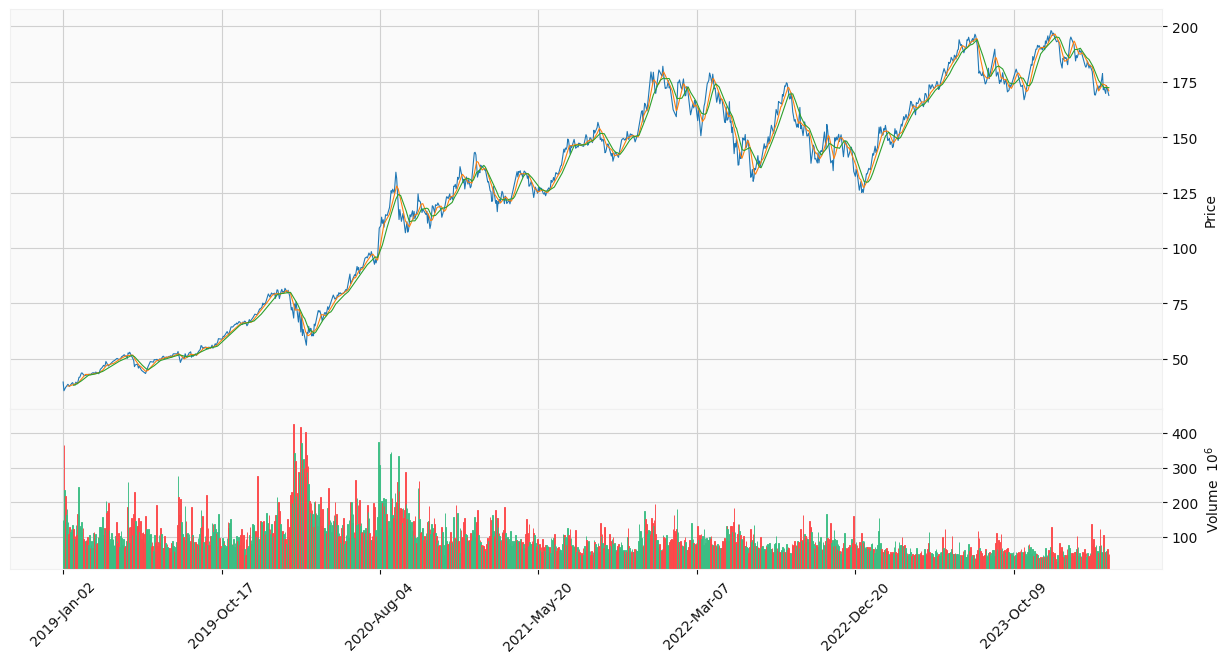

In [ ]:
mpf.plot(apple.head(1321), type='line', figsize = (16,8), volume=True, mav=(7,14), style='yahoo')
# Ações da apple de (2019) até hoje (2024)

In [ ]:
nvidia = yf.download('NVDA', start='2021-01-01', end='2024-04-03')
nvidia

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,131.042496,136.524994,129.625000,131.134995,130.833954,56064000
2021-01-05,130.997498,134.434998,130.869995,134.047501,133.739792,32276000
2021-01-06,132.225006,132.449997,125.860001,126.144997,125.855431,58042400
2021-01-07,129.675003,133.777496,128.865005,133.440002,133.133667,46148000
2021-01-08,133.625000,134.210007,130.419998,132.767502,132.462723,29252800
...,...,...,...,...,...,...
2024-03-26,958.510010,963.750000,925.020020,925.609985,925.609985,51364800
2024-03-27,931.119995,932.400024,891.229980,902.500000,902.500000,58606700
2024-03-28,900.000000,913.000000,891.929993,903.559998,903.559998,43521200


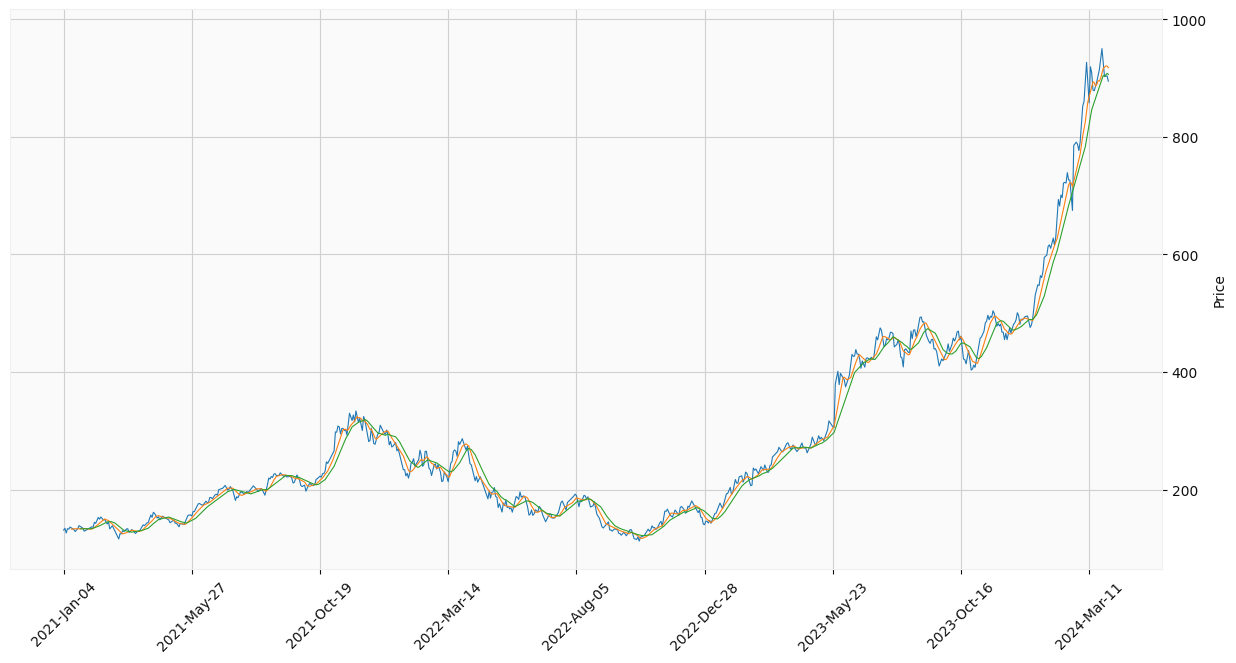

In [ ]:
mpf.plot(nvidia.head(816), type='line', figsize = (16,8), volume=False, mav=(7,14), style='yahoo')
# Ações da nvidia de (2021) para (2024)